In [1]:
import numpy as np
import pandas as pd

In [2]:
deliveries_df = pd.read_csv('/content/deliveries.csv')
matches_df = pd.read_csv('/content/matches.csv')

print("Deliveries shape:", deliveries_df.shape)
print("Matches shape:", matches_df.shape)

deliveries = deliveries_df.copy()
matches = matches_df.copy()

Deliveries shape: (260920, 17)
Matches shape: (1095, 20)


In [3]:
display(matches.head())
print(matches.columns.unique)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


<bound method Index.unique of Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')>


In [4]:
matches.info()
print("Total missing values in the data",matches.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [6]:
display(deliveries.info())
print("Total missing values in the data",deliveries.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

None

Total missing values in the data 994301


In [7]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


#Data cleaning

In [8]:
missing_winner_rows = matches[matches['winner'].isnull()]
display(missing_winner_rows)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


For five matches, the result=no result and winner=NaN. We can remove these five matches from the dataset.


In [9]:
# Drop rows with missing values in the winner column
matches=matches.dropna(subset=["winner"])

Columns like city, id, method,umpire1,umpire2 are not required for the prediction. City is not required because city is already mentioned in the venue columns.

In [10]:
# Drop unwanted columns from the dataset
matches.drop(['id', 'city', 'method','umpire1','umpire2'], axis=1, inplace=True)

<ipython-input-10-7bde996faacc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.drop(['id', 'city', 'method','umpire1','umpire2'], axis=1, inplace=True)


In [11]:
print(matches.info())
print("missing values in the data:",matches.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   date             1090 non-null   object 
 2   match_type       1090 non-null   object 
 3   player_of_match  1090 non-null   object 
 4   venue            1090 non-null   object 
 5   team1            1090 non-null   object 
 6   team2            1090 non-null   object 
 7   toss_winner      1090 non-null   object 
 8   toss_decision    1090 non-null   object 
 9   winner           1090 non-null   object 
 10  result           1090 non-null   object 
 11  result_margin    1076 non-null   float64
 12  target_runs      1090 non-null   float64
 13  target_overs     1090 non-null   float64
 14  super_over       1090 non-null   object 
dtypes: float64(3), object(12)
memory usage: 136.2+ KB
None
missing values in the data: 14


Now, there are missing values in the result_margin column. First plot boxplot to check for outliers in the data.

In [12]:
!pip install plotly
import plotly.express as px

columns_to_handle_missing = ['result_margin']

# Create interactive box plot
fig = px.box(matches, y=columns_to_handle_missing, title='Interactive Box Plot of Columns with Missing Values')
fig.update_layout(yaxis_title="Values")
fig.show()

For result margin
Distribution: Positively skewed (many low values, fewer high ones).
Min=1
Max=146
Median=8. There are outliers. So, i will substitute median for missing values.  

In [13]:
# Impute selected columns with median because they have outliers

matches['result_margin'] = matches['result_margin'].fillna(matches['result_margin'].median())

In [14]:
print(" Missing values in the data ", matches.isnull().sum().sum())

 Missing values in the data  0


There are no missing values in the data.

In [15]:
matches.nunique()

,0
season,17
date,821
match_type,8
player_of_match,291
venue,58
team1,19
team2,19
toss_winner,19
toss_decision,2
winner,19


# Feature engineering

In [16]:
# Extract date features
if 'date' in matches.columns:
   matches['date'] = pd.to_datetime(matches['date'])
   matches['year'] = matches['date'].dt.year
   matches['month'] = matches['date'].dt.month
   matches['day'] = matches['date'].dt.day

# Drop the original date column
   matches.drop('date', axis=1, inplace=True)
   display(matches.head())
else:
    print("The 'date' column does not exist in the DataFrame.")

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,year,month,day
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,2008,4,19
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,2008,4,19
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,2008,4,20
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,2008,4,20


In [17]:
# Function to split season values
def split_season(season):
    season = str(season) # Convert season to string before checking for '/'
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20' + end) if len(end) == 2 else int(end)
    else:
        start = end = int(season)
    return start, end

# Apply the function to create new columns
matches[['season_start', 'season_end']] = matches['season'].apply(lambda x: pd.Series(split_season(x)))

# Convert to datetime and extract year
matches['season_start'] = pd.to_datetime(matches['season_start'], format='%Y').dt.year
matches['season_end'] = pd.to_datetime(matches['season_end'], format='%Y').dt.year

# Drop the original 'season' column
matches.drop('season', axis=1, inplace=True)
display(matches.head())

,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,year,month,day,season_start,season_end
0,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18,2007,2008
1,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,2008,4,19,2007,2008
2,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,2008,4,19,2007,2008
3,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,2008,4,20,2007,2008
4,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,2008,4,20,2007,2008


In [18]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [19]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in the 'winner' column
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

# Feature Extraction from the matches dataset

In [20]:
teams = pd.concat([matches['team1'], matches['team2']]).unique()
team_stats = pd.DataFrame(teams, columns=['team_name'])

team_stats

,team_name
0,Royal Challengers Bangalore
1,Punjab Kings
2,Delhi Capitals
3,Mumbai Indians
4,Kolkata Knight Riders
5,Rajasthan Royals
6,Sunrisers Hyderabad
7,Chennai Super Kings
8,Kochi Tuskers Kerala
9,Pune Warriors


In [21]:
# Calculate matches played and won
team_stats['matches_played'] = team_stats['team_name'].apply(lambda x: len(matches[(matches['team1'] == x) | (matches['team2'] == x)]))
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: len(matches[matches['winner'] == x]))
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,252,123,48.809524
1,Punjab Kings,246,112,45.528455
2,Delhi Capitals,250,115,46.000000
3,Mumbai Indians,261,144,55.172414
4,Kolkata Knight Riders,251,131,52.191235
5,Rajasthan Royals,219,112,51.141553
6,Sunrisers Hyderabad,257,117,45.525292
7,Chennai Super Kings,237,138,58.227848
8,Kochi Tuskers Kerala,14,6,42.857143
9,Pune Warriors,75,27,36.000000


In [22]:
team_stats['total_runs_scored'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_runs'].sum() + matches[matches['team2'] == x]['target_runs'].sum())
team_stats['total_wickets_taken'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_overs'].sum() + matches[matches['team2'] == x]['target_overs'].sum())

team_stats['total_runs_scored'] = team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken'] = team_stats['total_wickets_taken'].astype(int)

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975
1,Punjab Kings,246,112,45.528455,41178,4854
2,Delhi Capitals,250,115,46.000000,41234,4920
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Kolkata Knight Riders,251,131,52.191235,40557,4907
5,Rajasthan Royals,219,112,51.141553,36187,4358
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080
7,Chennai Super Kings,237,138,58.227848,39503,4693
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277
9,Pune Warriors,75,27,36.000000,11514,1471


In [23]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['batting_team'] == x]['total_runs'].sum() / (deliveries[deliveries['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['bowling_team'] == x]['total_runs'].sum() / (deliveries[deliveries['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307


In [24]:
# Exclude no-result matches from deliveries
no_result_match_ids = [501265, 829763, 829813, 1178424, 1359519]
filtered_deliveries = deliveries[~deliveries['match_id'].isin(no_result_match_ids)]

# Highest and lowest scores excluding no-result matches
highest_scores = filtered_deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].max())
team_stats['lowest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].min())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613,287,44
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99


In [25]:
# Total 4s and 6s
team_stats['total_4s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 4)].shape[0])
team_stats['total_6s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 6)].shape[0])

# Average Powerplay and Death overs scores
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries[(deliveries['over'] > 15)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score'] = team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team'] == x]['total_runs'].mean())
team_stats['average_death_overs_score'] = team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team'] == x]['total_runs'].mean())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58,3088,1233,53.518182,35.517073
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613,287,44,2405,1042,55.879121,36.261628
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55,3196,1509,53.295359,39.741228
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74,170,53,54.928571,30.636364
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99,525,196,47.577778,30.909091


In [26]:
def get_wins_vs_opponent(team1, team2):
    # Filter matches between the two teams
    team1_vs_team2 = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
                             ((matches['team1'] == team2) & (matches['team2'] == team1))]

    # Count wins for team1 against team2
    wins = len(team1_vs_team2[team1_vs_team2['winner'] == team1])
    return wins

def get_last_5_win_rate(team1, team2):
    # Filter matches between the two teams
    team1_vs_team2 = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
                             ((matches['team1'] == team2) & (matches['team2'] == team1))]

    # Get last 5 matches
    last_5_matches = team1_vs_team2.tail(5)

    # Calculate win rate
    wins_in_last_5 = len(last_5_matches[last_5_matches['winner'] == team1])
    win_rate = (wins_in_last_5 / len(last_5_matches)) if len(last_5_matches) > 0 else 0  # Handle empty DataFrames
    return win_rate

# Add the new features
matches['wins_vs_opponent'] = matches.apply(lambda row: get_wins_vs_opponent(row['team1'], row['team2']), axis=1)
matches['last_5_vs_opponent_win_rate'] = matches.apply(lambda row: get_last_5_win_rate(row['team1'], row['team2']), axis=1)

display(matches.head())

,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,year,month,day,season_start,season_end,wins_vs_opponent,last_5_vs_opponent_win_rate
0,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18,2007,2008,14,0.2
1,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,2008,4,19,2007,2008,14,0.8
2,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,2008,4,19,2007,2008,14,0.4
3,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,2008,4,20,2007,2008,19,0.4
4,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,2008,4,20,2007,2008,26,0.8


In [27]:
def get_wins_vs_opponent(team1, team2):
    # Filter matches between the two teams
    team1_vs_team2 = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
                             ((matches['team1'] == team2) & (matches['team2'] == team1))]

    # Count wins for team1 against team2
    wins = len(team1_vs_team2[team1_vs_team2['winner'] == team1])
    return wins

for team in team_stats['team_name'].unique():
    team_stats[f'wins_vs_{team}'] = team_stats['team_name'].apply(lambda x: get_wins_vs_opponent(x, team))

display(team_stats)

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,...,wins_vs_Delhi Capitals,wins_vs_Mumbai Indians,wins_vs_Kolkata Knight Riders,wins_vs_Rajasthan Royals,wins_vs_Sunrisers Hyderabad,wins_vs_Chennai Super Kings,wins_vs_Kochi Tuskers Kerala,wins_vs_Pune Warriors,wins_vs_Gujarat Titans,wins_vs_Lucknow Super Giants
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,...,19,14,14,15,16,11,2,7,6,3
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,...,17,15,12,12,14,14,1,5,4,1
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,...,0,16,15,14,18,11,1,5,6,2
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,...,19,0,23,15,19,20,0,7,4,1
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,...,18,11,0,14,26,10,0,7,2,2
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,...,15,14,14,0,16,13,1,4,1,4
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613,287,...,17,14,11,13,0,10,1,6,6,1
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,...,19,17,19,16,21,0,1,4,3,1
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,...,1,1,2,1,0,1,0,0,0,0
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,...,4,5,2,1,4,2,1,0,1,0


In [28]:
# Select only the head-to-head win columns
head_to_head_data = team_stats[[f'wins_vs_{team}' for team in team_stats['team_name'].unique()]]

# Set the index to team names for better visualization
head_to_head_data.index = team_stats['team_name']

# Remove the 'team_name' column from the index
head_to_head_data = head_to_head_data.drop(columns=[f'wins_vs_{team_stats["team_name"].iloc[-1]}'])  # Remove the self-win column

# Feature extraction from the deliveries dataset

In [29]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [30]:
# Add 'balls_faced'
batgroup = deliveries.groupby(['batter'])
batsman_stats = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball': 'balls_faced'})
batsman_stats.head()

,balls_faced
batter,
A Ashish Reddy,196
A Badoni,505
A Chandila,7
A Chopra,75
A Choudhary,20


In [31]:
# Add 'innings'
batsman_stats['innings'] = batgroup['inning'].nunique()
batsman_stats.head()

,balls_faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,505,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [32]:
# Add 'runs'
batsman_stats['runs'] = batgroup['batsman_runs'].sum()
batsman_stats.head()

,balls_faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,505,2,634
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [33]:
# Add '0s'
batsman_stats['0s'] = deliveries[deliveries['batsman_runs'] == 0].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'0s': 0}, inplace=True)
batsman_stats['0s'] = batsman_stats['0s'].astype(int)

batsman_stats['1s'] = deliveries[deliveries['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'1s': 0}, inplace=True)
batsman_stats['1s'] = batsman_stats['1s'].astype(int)

batsman_stats['2s'] = deliveries[deliveries['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'2s': 0}, inplace=True)
batsman_stats['2s'] = batsman_stats['2s'].astype(int)

batsman_stats['3s'] = deliveries[deliveries['batsman_runs'] == 3].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'3s': 0}, inplace=True)
batsman_stats['3s'] = batsman_stats['3s'].astype(int)

batsman_stats['4s'] = deliveries[deliveries['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'4s': 0}, inplace=True)
batsman_stats['4s'] = batsman_stats['4s'].astype(int)

batsman_stats['6s'] = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'6s': 0}, inplace=True)
batsman_stats['6s'] = batsman_stats['6s'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15
A Badoni,505,2,634,183,201,48,3,46,24
A Chandila,7,1,4,3,4,0,0,0,0
A Chopra,75,2,53,45,21,2,0,7,0
A Choudhary,20,2,25,4,13,1,0,1,1


In [34]:
# Add 'highest_score'
batsman_stats['highest_score'] = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max()

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36
A Badoni,505,2,634,183,201,48,3,46,24,59
A Chandila,7,1,4,3,4,0,0,0,0,4
A Chopra,75,2,53,45,21,2,0,7,0,24
A Choudhary,20,2,25,4,13,1,0,1,1,15


In [35]:
# Add 'player_out'
batsman_stats['player_out'] = batgroup['is_wicket'].count()
batsman_stats.head()

batsman_stats['player_out'] = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count()
batsman_stats.fillna({'player_out': 0}, inplace=True) # there might be not-out matches
batsman_stats['player_out'] = batsman_stats['player_out'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out
batter,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15
A Badoni,505,2,634,183,201,48,3,46,24,59,26
A Chandila,7,1,4,3,4,0,0,0,0,4,1
A Chopra,75,2,53,45,21,2,0,7,0,24,5
A Choudhary,20,2,25,4,13,1,0,1,1,15,2


In [36]:
# Add 'batting_avg'
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0, axis=1)

# Add 'batting_strike_rate'
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced'] > 0 else 0, axis=1)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out,batting_avg,batting_strike_rate
batter,,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15,18.67,142.86
A Badoni,505,2,634,183,201,48,3,46,24,59,26,24.38,125.54
A Chandila,7,1,4,3,4,0,0,0,0,4,1,4.00,57.14
A Chopra,75,2,53,45,21,2,0,7,0,24,5,10.60,70.67
A Choudhary,20,2,25,4,13,1,0,1,1,15,2,12.50,125.00


In [37]:
# Add 'balls_throw'
bowlgroup = deliveries.groupby(['bowler'])
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})
bowler_stats.head()

,balls_throw
bowler,
A Ashish Reddy,270
A Badoni,25
A Chandila,234
A Choudhary,108
A Dananjaya,25


In [38]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [39]:
# Add 'wickets'
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_stats['wickets'] = wickets.groupby(['bowler'])['ball'].count()
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)
bowler_stats.head()

,balls_throw,wickets
bowler,,
A Ashish Reddy,270,18
A Badoni,25,2
A Chandila,234,11
A Choudhary,108,5
A Dananjaya,25,0


In [40]:
# Add 'overs'
bowler_stats['overs'] = round(bowler_stats['balls_throw']/6).astype(int)
bowler_stats.fillna({'overs': 0}, inplace=True)
bowler_stats.head()

,balls_throw,wickets,overs
bowler,,,
A Ashish Reddy,270,18,45
A Badoni,25,2,4
A Chandila,234,11,39
A Choudhary,108,5,18
A Dananjaya,25,0,4


In [41]:
# Add 'runs_conceded'
bowler_stats['runs_conceded'] = deliveries.groupby('bowler')['batsman_runs'].sum()
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra_runs to the 'runs_conceded'
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].add(deliveries[deliveries['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['extra_runs'].sum(), fill_value=0)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)
bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18,45,396
A Badoni,25,2,4,36
A Chandila,234,11,39,242
A Choudhary,108,5,18,144
A Dananjaya,25,0,4,47


In [42]:
# Add 'bowling_econ'
bowler_stats['bowling_econ'] = bowler_stats.apply(
    lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'),
    axis=1
)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(
    lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'),
    axis=1
)

bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18,45,396,8.80,15.00
A Badoni,25,2,4,36,9.00,12.50
A Chandila,234,11,39,242,6.21,21.27
A Choudhary,108,5,18,144,8.00,21.60
A Dananjaya,25,0,4,47,11.75,inf


In [43]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in deliveries.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

players.head()

,matches
players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1


In [44]:
# Catches Caught by Players
outbyCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catches.fillna(0, inplace=True)
catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
catches['catches'] = catches['catches'].astype(int)

catches.head()

,catches
A Ashish Reddy,9
A Badoni,14
A Chandila,7
A Chopra,2
A Flintoff,4


In [45]:
# Merging Batsman Stats
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match of not
players = players.merge(matches['player_of_match'].value_counts().rename('man_of_the_match_count'),
                        left_index=True, right_index=True, how='left').fillna(0)

# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
players.fillna(0, inplace=True)

players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [46]:
# Create a new DataFrame for batter vs bowler records
batter_bowler_stats = deliveries.groupby(['batter', 'bowler'])[['batsman_runs', 'is_wicket']].agg({'batsman_runs': 'sum', 'is_wicket': 'sum'})
batter_bowler_stats.rename(columns={'batsman_runs': 'runs_scored', 'is_wicket': 'dismissals'}, inplace=True)

# Add balls faced
balls_faced = deliveries.groupby(['batter', 'bowler'])['ball'].count().rename('balls_faced')
batter_bowler_stats = batter_bowler_stats.join(balls_faced)

# Calculate other metrics like strike rate, average, etc.
batter_bowler_stats['strike_rate'] = (batter_bowler_stats['runs_scored'] / batter_bowler_stats['balls_faced']) * 100
batter_bowler_stats['average'] = batter_bowler_stats['runs_scored'] / batter_bowler_stats['dismissals']

# Replace infinite values with 0 in 'average' column
batter_bowler_stats['average'] = batter_bowler_stats['average'].replace([np.inf, -np.inf], 0)
# Sort by dismissals and get top 3 bowlers for each batter, including bowler name
batter_bowler = batter_bowler_stats.groupby('batter').apply(
    lambda x: x.sort_values('dismissals', ascending=False).head(3)
).reset_index(level=0)  # Include batter and bowler names, specify level to reset


# Display the head of the new DataFrame with top 3 bowlers and names
display(batter_bowler.head())

batter  runs_scored  dismissals  \
batter         bowler                                                   
A Ashish Reddy R Vinay Kumar  A Ashish Reddy           14           2   
               A Nehra        A Ashish Reddy            7           1   
               DJ Bravo       A Ashish Reddy           24           1   
A Badoni       SP Narine            A Badoni           30           3   
               JR Hazlewood         A Badoni            3           2   

                              balls_faced  strike_rate  average  
batter         bowler                                            
A Ashish Reddy R Vinay Kumar           11   127.272727      7.0  
               A Nehra                  9    77.777778      7.0  
               DJ Bravo                13   184.615385     24.0  
A Badoni       SP Narine               31    96.774194     10.0  
               JR Hazlewood             9    33.333333      1.5

In [47]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,...,wins_vs_Delhi Capitals,wins_vs_Mumbai Indians,wins_vs_Kolkata Knight Riders,wins_vs_Rajasthan Royals,wins_vs_Sunrisers Hyderabad,wins_vs_Chennai Super Kings,wins_vs_Kochi Tuskers Kerala,wins_vs_Pune Warriors,wins_vs_Gujarat Titans,wins_vs_Lucknow Super Giants
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,...,19,14,14,15,16,11,2,7,6,3
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,...,17,15,12,12,14,14,1,5,4,1
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,...,0,16,15,14,18,11,1,5,6,2
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,...,19,0,23,15,19,20,0,7,4,1
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,...,18,11,0,14,26,10,0,7,2,2


In [48]:
matches.head()

,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,year,month,day,season_start,season_end,wins_vs_opponent,last_5_vs_opponent_win_rate
0,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,2008,4,18,2007,2008,14,0.2
1,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,2008,4,19,2007,2008,14,0.8
2,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,2008,4,19,2007,2008,14,0.4
3,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,2008,4,20,2007,2008,19,0.4
4,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,2008,4,20,2007,2008,26,0.8


# Data analysis

In [49]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

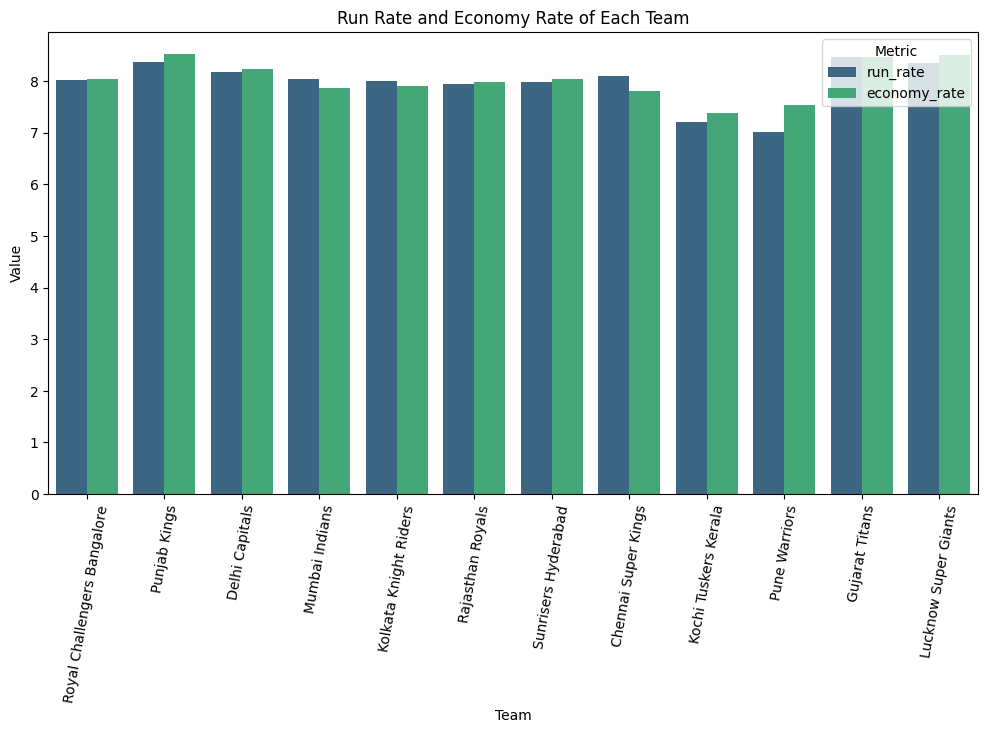

In [50]:
# Plotting Run Rate & Economy Rate
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['run_rate', 'economy_rate'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()

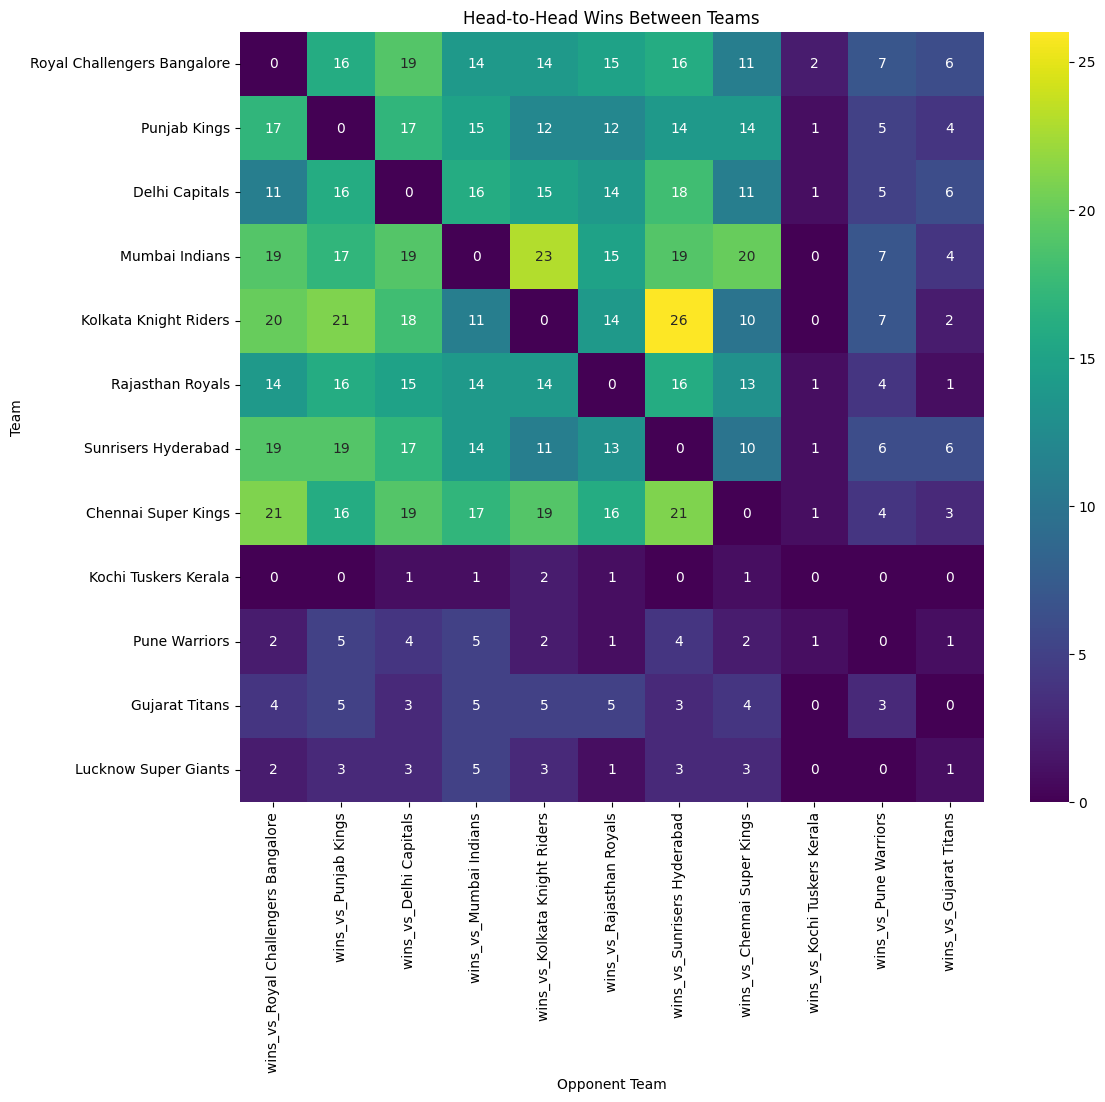

In [51]:
# Head-to-head wins between teams
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(head_to_head_data, annot=True, cmap='viridis', fmt='d')
plt.title('Head-to-Head Wins Between Teams')
plt.xlabel('Opponent Team')
plt.ylabel('Team')
plt.show()

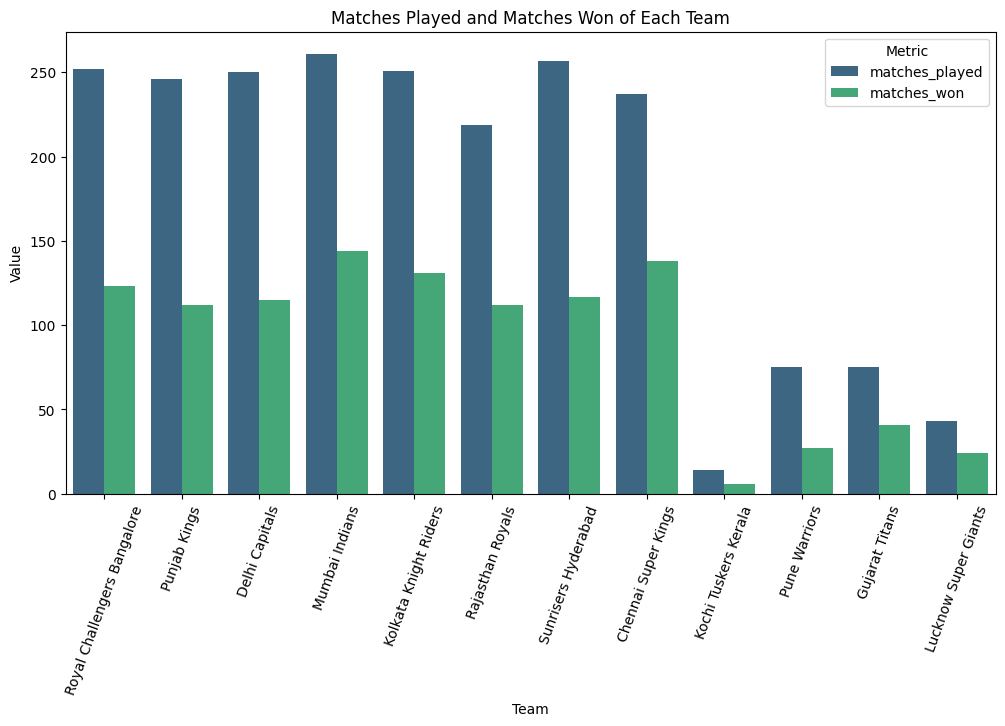

In [52]:
# Plotting Matches Played & Winning Percentage
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['matches_played', 'matches_won'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Matches Played and Matches Won of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()

In [53]:
import plotly.express as px
import pandas as pd

# Melting the DataFrame
team_stats_melted = team_stats.melt(
    id_vars=['team_name'],
    value_vars=['highest_score', 'lowest_score'],
    var_name='Score Type',
    value_name='Score'
)

# Creating interactive bar plot
fig = px.bar(
    team_stats_melted,
    x='team_name',
    y='Score',
    color='Score Type',
    barmode='group',
    title='Highest and Lowest Scores of Each Team',
    labels={'team_name': 'Team'}
)

fig.update_layout(
    xaxis_tickangle=-80,
    template='plotly',
    width=1000,
    height=600
)

fig.show()


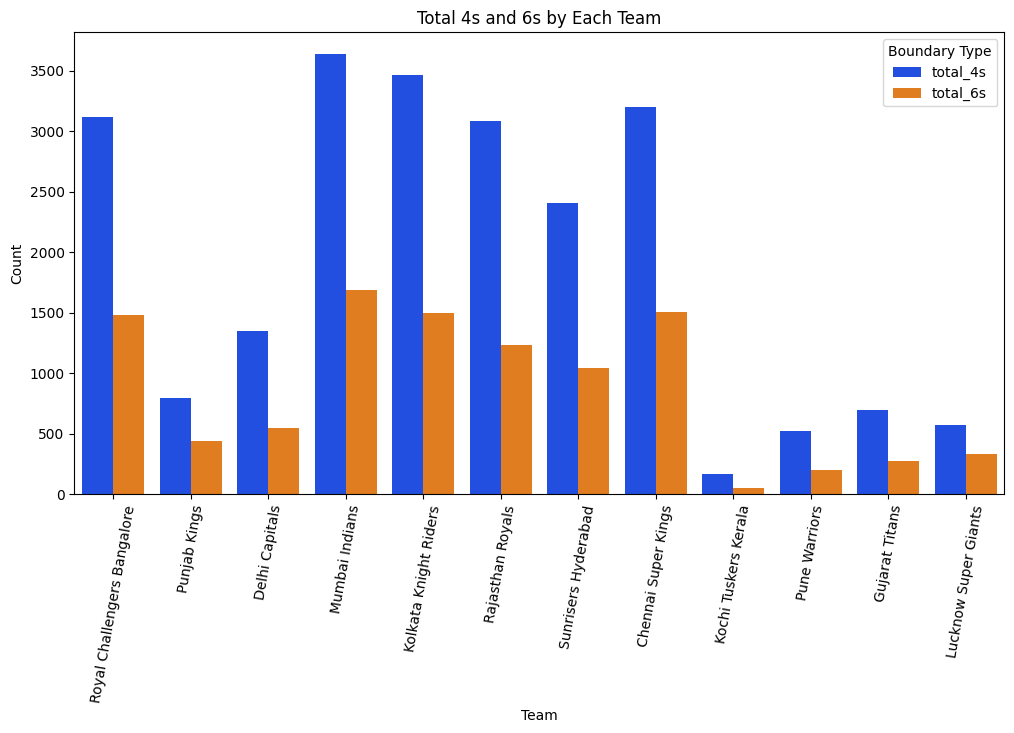

In [54]:
# Plotting Total 4s and 6s
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['total_4s', 'total_6s'],
                                    var_name='Boundary Type', value_name='Count')
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='bright')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

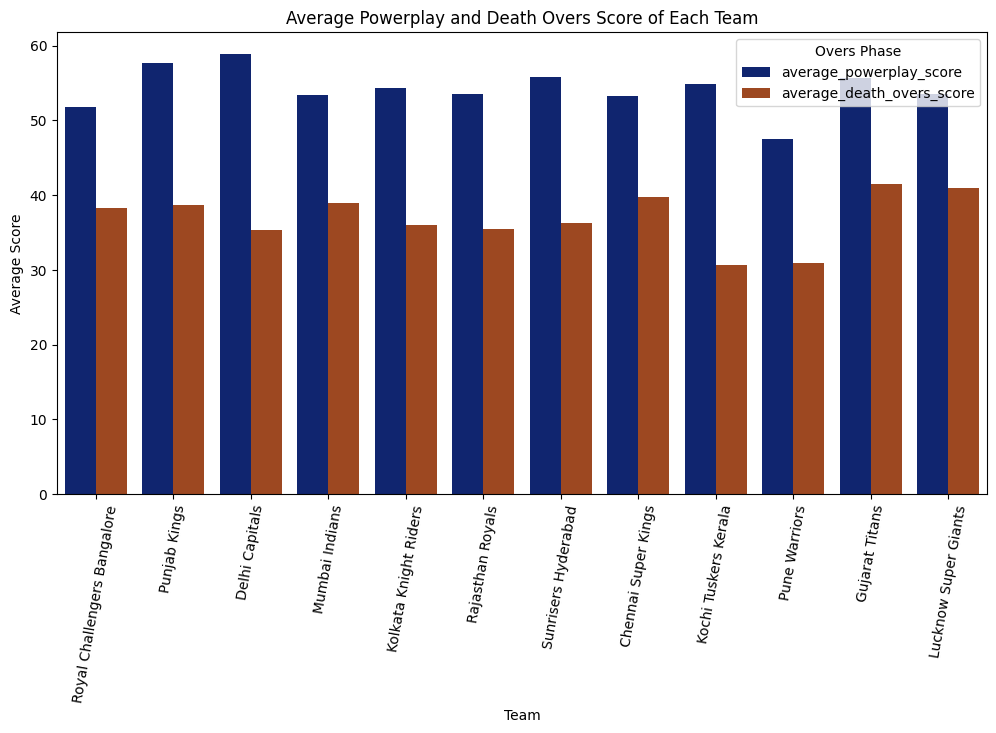

In [55]:
# Plotting Average Powerplay and Death Overs Score
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['average_powerplay_score', 'average_death_overs_score'],
                                    var_name='Overs Phase', value_name='Average Score')
sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='dark')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()

In [56]:
import plotly.express as px
import pandas as pd

# Filter matches where toss winner = match winner
toss_win_matches = matches[matches['toss_winner'] == matches['winner']]

# Count number of wins per team after winning toss
toss_win_counts = toss_win_matches['winner'].value_counts().reset_index()
toss_win_counts.columns = ['team', 'wins_after_toss']

# Interactive Pie Chart
fig = px.pie(toss_win_counts,
             names='team',
             values='wins_after_toss',
             title='Wins by Teams After Winning Toss',
             hole=0.4)  # For donut style, optional

fig.update_traces(textinfo='percent+label')

fig.update_layout(template='plotly')

fig.show()


# 2) Player's performance

In [57]:
players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [58]:
batter_bowler.head()

batter  runs_scored  dismissals  \
batter         bowler                                                   
A Ashish Reddy R Vinay Kumar  A Ashish Reddy           14           2   
               A Nehra        A Ashish Reddy            7           1   
               DJ Bravo       A Ashish Reddy           24           1   
A Badoni       SP Narine            A Badoni           30           3   
               JR Hazlewood         A Badoni            3           2   

                              balls_faced  strike_rate  average  
batter         bowler                                            
A Ashish Reddy R Vinay Kumar           11   127.272727      7.0  
               A Nehra                  9    77.777778      7.0  
               DJ Bravo                13   184.615385     24.0  
A Badoni       SP Narine               31    96.774194     10.0  
               JR Hazlewood             9    33.333333      1.5

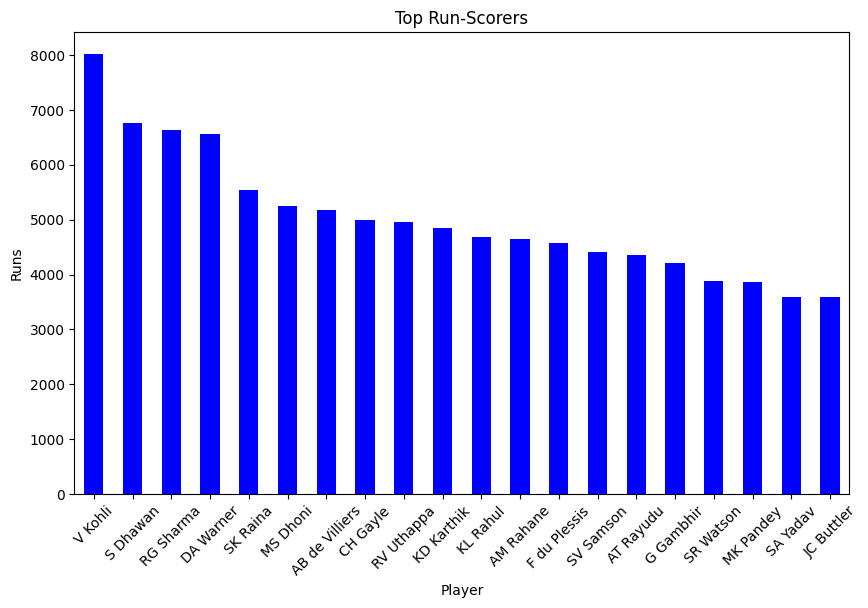

In [59]:
# Plotting top run-scorers
plt.figure(figsize=(10, 6))
top_run_scorers = players['runs'].nlargest(20)
top_run_scorers.plot(kind='bar', color='blue')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45)
plt.show()

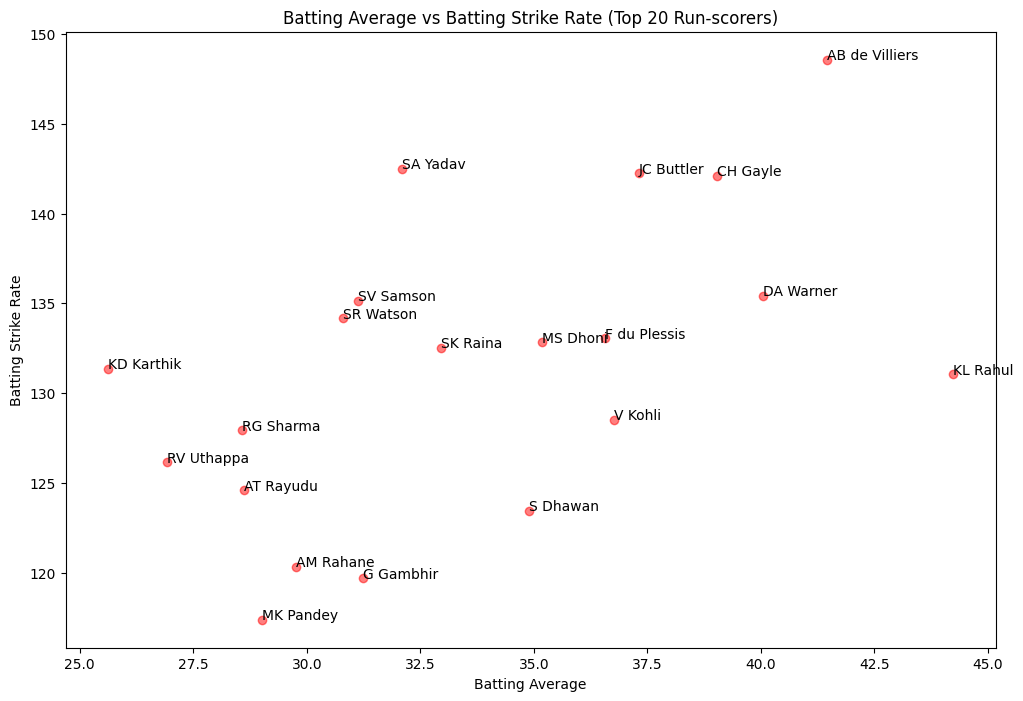

In [60]:
# Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg'], top_run_scorers['batting_strike_rate'], color='red', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with the player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg'], player['batting_strike_rate']))

plt.show()

In [61]:
import plotly.express as px

# Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')

# Interactive Scatter Plot
fig = px.scatter(top_run_scorers,
                 x='batting_avg',
                 y='batting_strike_rate',
                 text=top_run_scorers.index,  # Annotate with player name/index
                 color_discrete_sequence=['red'],
                 title='Batting Average vs Batting Strike Rate (Top 20 Run-scorers)',
                 labels={'batting_avg': 'Batting Average', 'batting_strike_rate': 'Batting Strike Rate'},
                 hover_data=['runs'])

fig.update_traces(textposition='top center')

fig.update_layout(
    template='plotly',
    xaxis_title='Batting Average',
    yaxis_title='Batting Strike Rate',
)

fig.show()


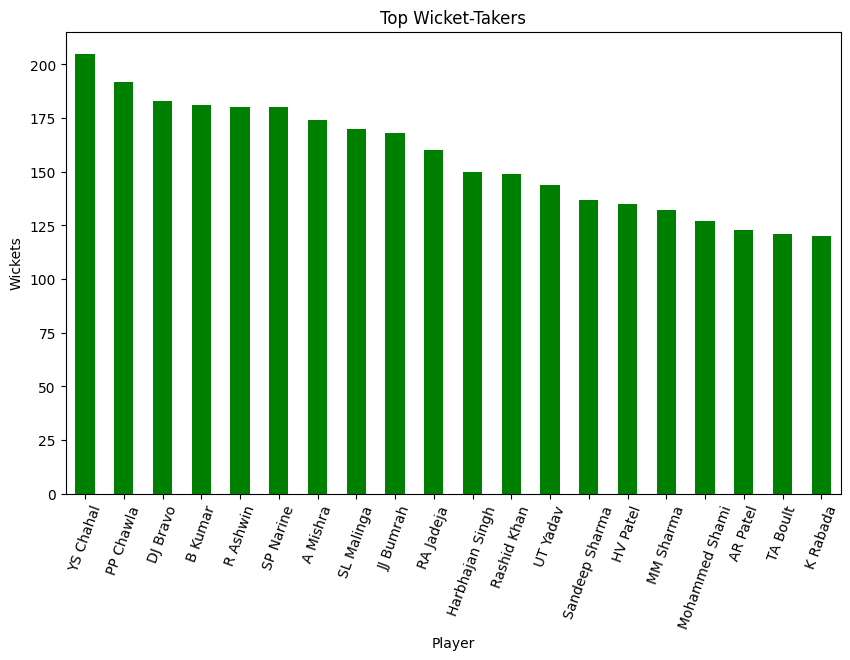

In [62]:
# Plotting top wicket-takers
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='green')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()

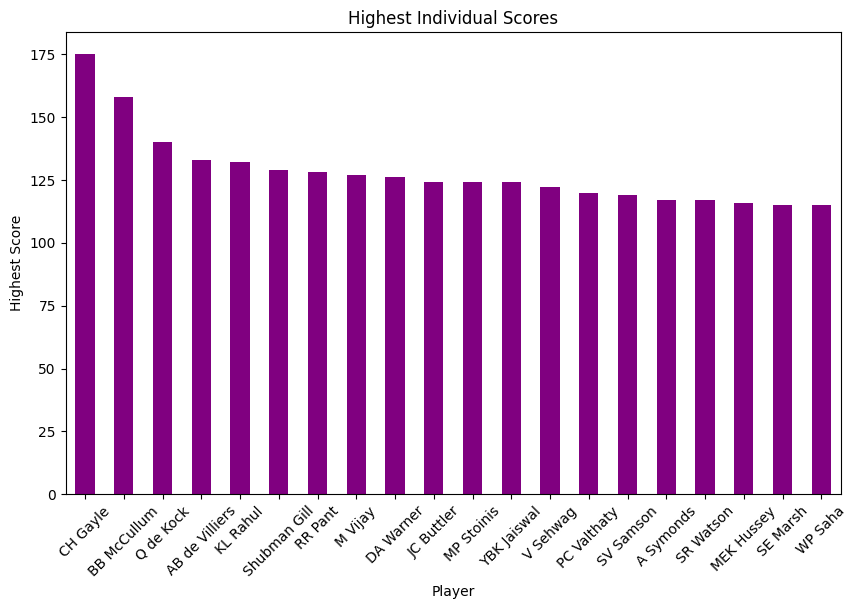

In [63]:
# Plotting top highest individual scores
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='purple')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

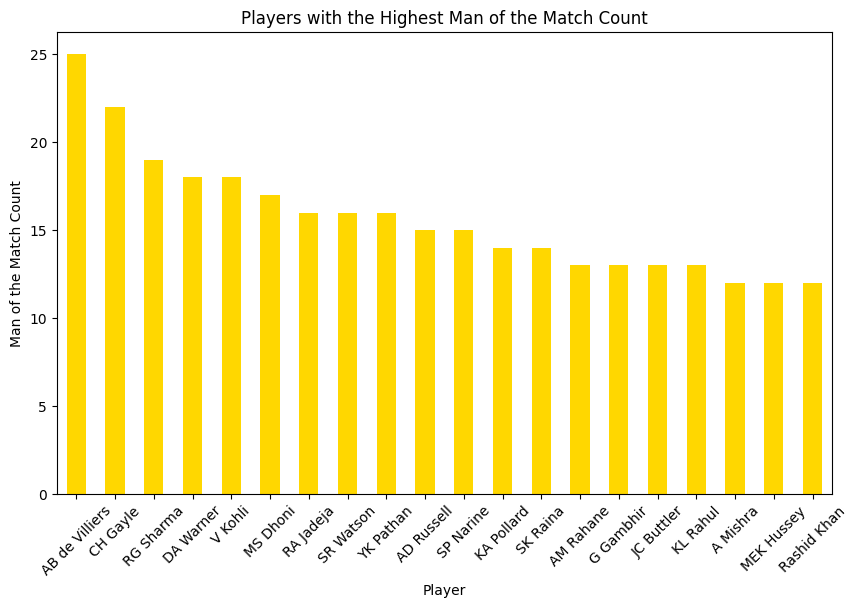

In [64]:
# Man of the Match Count
plt.figure(figsize=(10, 6))
top_mom_players = players['man_of_the_match_count'].nlargest(20)
top_mom_players.plot(kind='bar', color='gold')
plt.xlabel('Player')
plt.ylabel('Man of the Match Count')
plt.title('Players with the Highest Man of the Match Count')
plt.xticks(rotation=45)
plt.show()

In [65]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Copy the DataFrame
players_copy = players.copy()

players_copy = players_copy[['bowling_econ', 'batting_avg']]

# Handle inf and NaN values
players_copy = players_copy.replace([float('inf'), -float('inf')], pd.NA)
players_copy = players_copy.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(players_copy)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

players_copy['clusters'] = clusters
players = players.join(players_copy['clusters'], how='left', rsuffix='_cluster')

# Cluster labels
cluster_labels = {0: 'Batter', 1: 'Bowler', 2: 'All-rounder'}

# Add readable cluster names
players['cluster'] = players['clusters'].map(cluster_labels)

# Remove rows with missing cluster info
players_no_nan = players.dropna(subset=['cluster'])

# Interactive scatter plot using Plotly
fig = px.scatter(players_no_nan,
                 x='batting_avg',
                 y='bowling_econ',
                 color='cluster',
                 title='Batting Average vs Bowling Economy Rate with Clusters',
                 labels={'batting_avg': 'Batting Average', 'bowling_econ': 'Bowling Economy Rate'},
                 hover_data=['cluster'])

fig.update_layout(
    yaxis=dict(autorange='reversed'),  # Reverse y-axis to match your logic
    legend_title='Player Type',
    template='plotly'
)

fig.show()


#3. Seasonal Analysis

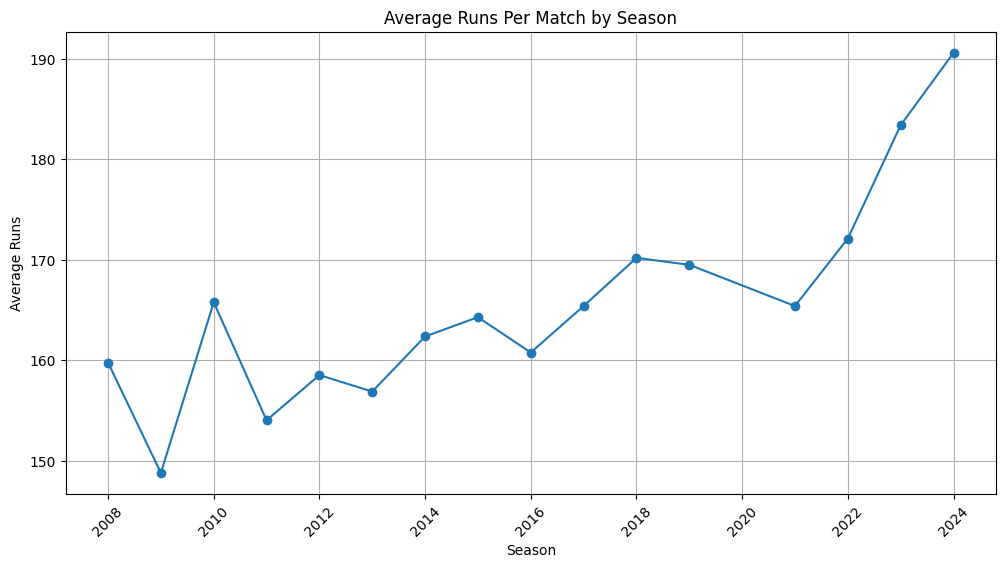

In [66]:
# Calculate average runs per match per season
seasonal_runs = matches.groupby('season_end').agg({'target_runs': 'mean'}).reset_index()
seasonal_runs.columns = ['season_end', 'average_runs']

plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['season_end'], seasonal_runs['average_runs'], marker='o')
plt.title('Average Runs Per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Winner prediction model

In [67]:
deliveries = deliveries_df.copy()
matches = matches_df.copy()

In [68]:
inning_scores = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inning_scores = inning_scores[inning_scores['inning']==1]
inning_scores.head()

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [69]:
inning_scores['target'] = inning_scores['total_runs'] + 1
inning_scores.head()

,match_id,inning,total_runs,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111


In [70]:
matches.rename(columns={'id': 'match_id'}, inplace=True)
matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [71]:
matches = matches.merge(inning_scores[['match_id','target']], on='match_id')
matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111


In [72]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [73]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in team columns
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

In [74]:
# Teams that will play in 2025 season
teams_2025 = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
]

# Extracting only the selected teams
matches = matches[matches['team1'].isin(teams_2025)]
matches = matches[matches['team2'].isin(teams_2025)]

matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111


In [75]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [76]:
# Replace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)

matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [77]:
matches.isnull().sum()

,0
match_id,0
season,0
city,51
date,0
match_type,0
player_of_match,4
venue,0
team1,0
team2,0
toss_winner,0


In [78]:
# Extracting only selected columns
matches = matches[['match_id', 'season', 'city', 'team1', 'team2', 'winner', 'target','toss_winner','toss_decision','result_margin']].dropna()
matches.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241,Chennai Super Kings,bat,33.0
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130,Rajasthan Royals,bat,9.0
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166,Mumbai Indians,bat,5.0
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111,Sunrisers Hyderabad,bat,5.0


In [79]:
matches.isnull().sum()

,0
match_id,0
season,0
city,0
team1,0
team2,0
winner,0
target,0
toss_winner,0
toss_decision,0
result_margin,0


In [80]:
# Replace the team names in the 'batting_team' column
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)

deliveries = deliveries[deliveries['batting_team'].isin(teams_2025)]
deliveries = deliveries[deliveries['bowling_team'].isin(teams_2025)]
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [81]:
# Merge to the final dataset
final = matches.merge(deliveries, on='match_id')
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [82]:
# Get only second inning matches
final = final[final['inning'] == 2]
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [83]:
# Add 'current_score'
final.loc[:, 'current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [84]:
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100
team_stats = team_stats.sort_values(by=['win_percentage'], ascending=False)
team_stats['rank'] = range(1, len(team_stats) + 1)
display(team_stats[['team_name', 'win_percentage', 'rank']])

,team_name,win_percentage,rank
7,Chennai Super Kings,58.227848,1
11,Lucknow Super Giants,55.813953,2
3,Mumbai Indians,55.172414,3
10,Gujarat Titans,54.666667,4
4,Kolkata Knight Riders,52.191235,5
5,Rajasthan Royals,51.141553,6
0,Royal Challengers Bangalore,48.809524,7
2,Delhi Capitals,46.000000,8
1,Punjab Kings,45.528455,9
6,Sunrisers Hyderabad,45.525292,10


In [85]:
# Merge to add 'team1_rank'
final = pd.merge(final, team_stats[['team_name', 'rank']], left_on='team1', right_on='team_name', how='left', suffixes=('', '_y'))  # Changed suffixes
final = final.rename(columns={'rank': 'team1_rank'})
final = final[[h for h in list(final) if 'team_name' not in h or h == 'team_name']]  # Remove the extra 'team_name_y' column
#final = final.rename(columns={'team_name_x': 'team_name'})  # Removed this line

# Merge to add 'team2_rank'
final = pd.merge(final, team_stats[['team_name', 'rank']], left_on='team2', right_on='team_name', how='left', suffixes=('', '_y'))  # Changed suffixes
final = final.rename(columns={'rank': 'team2_rank'})
final = final[[h for h in list(final) if 'team_name' not in h or h == 'team_name']]  # Remove the extra 'team_name_y' column
#final = final.rename(columns={'team_name_x': 'team_name'})  # Removed this line

# Display the updated DataFrame
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,team_name,team1_rank,team2_rank
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,1,NaN,0,NaN,NaN,NaN,1,Royal Challengers Bangalore,7,5
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,1,wides,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,1,NaN,0,NaN,NaN,NaN,3,Royal Challengers Bangalore,7,5
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,1,NaN,0,NaN,NaN,NaN,4,Royal Challengers Bangalore,7,5


In [86]:
# Add 'runs_left'
final.loc[:, 'runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,team_name,team1_rank,team2_rank,runs_left
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,0,NaN,NaN,NaN,1,Royal Challengers Bangalore,7,5,222
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,wides,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,0,NaN,NaN,NaN,3,Royal Challengers Bangalore,7,5,220
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,0,NaN,NaN,NaN,4,Royal Challengers Bangalore,7,5,219


In [87]:
# Add 'balls_left'
final.loc[:, 'balls_left'] = np.where(120 - final['over']*6 - final['ball']>=0, 120 - final['over']*6 - final['ball'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,team_name,team1_rank,team2_rank,runs_left,balls_left
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,NaN,NaN,1,Royal Challengers Bangalore,7,5,222,119
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221,118
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221,117
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,NaN,NaN,3,Royal Challengers Bangalore,7,5,220,116
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,0,NaN,NaN,NaN,4,Royal Challengers Bangalore,7,5,219,115


In [88]:
# Add 'wickets_left'
final.loc[:, 'wickets_left'] = 10 - final.groupby('match_id')['is_wicket'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,player_dismissed,dismissal_kind,fielder,current_score,team_name,team1_rank,team2_rank,runs_left,balls_left,wickets_left
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,NaN,NaN,1,Royal Challengers Bangalore,7,5,222,119,10
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221,118,10
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,NaN,NaN,2,Royal Challengers Bangalore,7,5,221,117,10
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,NaN,NaN,3,Royal Challengers Bangalore,7,5,220,116,10
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,NaN,NaN,4,Royal Challengers Bangalore,7,5,219,115,10


In [89]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0,
    (final['runs_left'] * 6) / final['balls_left'],
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,fielder,current_score,team_name,team1_rank,team2_rank,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,1,Royal Challengers Bangalore,7,5,222,119,10,6.0,11.193277
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,2,Royal Challengers Bangalore,7,5,221,118,10,6.0,11.237288
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,2,Royal Challengers Bangalore,7,5,221,117,10,4.0,11.333333
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,3,Royal Challengers Bangalore,7,5,220,116,10,4.5,11.379310
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,NaN,4,Royal Challengers Bangalore,7,5,219,115,10,4.8,11.426087


In [90]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head()

,match_id,season,city,team1,team2,winner,target,toss_winner,toss_decision,result_margin,...,current_score,team_name,team1_rank,team2_rank,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,1,Royal Challengers Bangalore,7,5,222,119,10,6.0,11.193277,0
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,2,Royal Challengers Bangalore,7,5,221,118,10,6.0,11.237288,0
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,2,Royal Challengers Bangalore,7,5,221,117,10,4.0,11.333333,0
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,3,Royal Challengers Bangalore,7,5,220,116,10,4.5,11.379310,0
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,140.0,...,4,Royal Challengers Bangalore,7,5,219,115,10,4.8,11.426087,0


In [91]:
winning_pred = final[['season', 'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target', 'result']]
winning_pred.head()

,season,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
0,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,6.0,11.193277,223,0
1,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,6.0,11.237288,223,0
2,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,4.0,11.333333,223,0
3,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,4.5,11.379310,223,0
4,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,4.8,11.426087,223,0


In [92]:
winning_pred['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [93]:
X = winning_pred.iloc[:,:-1]
X.head()

,season,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target
0,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,6.0,11.193277,223
1,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,6.0,11.237288,223
2,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,4.0,11.333333,223
3,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,4.5,11.379310,223
4,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,4.8,11.426087,223


In [94]:
y = winning_pred['result']

In [95]:
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != '2024']

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)

Training set size: (100116, 9) (100116,)
Test set size: (8210, 9) (8210,)


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Column transformer
trf = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city']),
    ('num', StandardScaler(), ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target'])
], remainder='passthrough')

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

# Assuming 'trf' is already defined from previous steps (the ColumnTransformer)
# If not, you'll need to include its definition here:
# trf = ColumnTransformer([...])

# Define the pipeline with the RandomForestClassifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) # Using RandomForestClassifier
])

# Train the model without hyperparameter tuning
pipe.fit(X_train_23, y_train_23)

# Assign the trained model to best_model_1 for consistency with later code
best_model = pipe

# You can skip the best_params_ and best_score_ as we are not doing hyperparameter tuning
# If you want a basic score, you can calculate it like this:
from sklearn.metrics import accuracy_score
y_pred_train_rf = best_model.predict(X_train_23)
best_score = accuracy_score(y_train_23, y_pred_train_rf)
y_pred_24_rf= best_model.predict(X_test_24)
print(f"Training accuracy with RandomForestClassifier: {best_score}")
accuracy= accuracy_score(y_test_24, y_pred_24_rf)
print("Test results")
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test_24, y_pred_24_rf, average='weighted')
print("precision:",precision)
recall=recall_score(y_test_24, y_pred_24_rf, average='weighted')
print("recall:",recall)

Training accuracy with RandomForestClassifier: 0.9999300811059172
Test results
Accuracy: 0.7884
precision: 0.7922350129418827
recall: 0.7884287454323995


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [98]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
# Assuming 'trf' is already defined from previous steps (the ColumnTransformer)
# If not, you'll need to include its definition here:
# trf = ColumnTransformer([...])

# Define the pipeline with the XGBoost classifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')) # Using XGBClassifier
])

# Train the model without hyperparameter tuning
pipe.fit(X_train_23, y_train_23)

# Assign the trained model to best_model_1 for consistency with later code
best_model= pipe

# You can skip the best_params_ and best_score_ as we are not doing hyperparameter tuning
# If you want a basic score, you can calculate it like this:
from sklearn.metrics import accuracy_score
y_pred_train = best_model.predict(X_train_23)
best_score= accuracy_score(y_train_23, y_pred_train)
y_pred_24_xgb= best_model.predict(X_test_24)
print(f"Training accuracy with XGBoostClassifier: {best_score}")
accuracy= accuracy_score(y_test_24, y_pred_24_xgb)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test_24, y_pred_24_xgb, average='weighted')
print("precision:",precision)
recall=recall_score(y_test_24, y_pred_24_xgb, average='weighted')
print("recall:",recall)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Training accuracy with XGBoostClassifier: 0.9922390027568021
Accuracy: 0.7675
precision: 0.776475429403572
recall: 0.7674786845310597


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [99]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define the pipeline with the XGBoost classifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Hyperparameter tuning
param_distributions = {
    'classifier__n_estimators': randint(100, 301),  # Range [100, 300]
    'classifier__max_depth': randint(3, 10),        # Range [3, 9]
    'classifier__learning_rate': uniform(0.01, 0.19), # Range [0.01, 0.2]
    'classifier__subsample': uniform(0.5, 0.5),       # Range [0.5, 1.0]
    'classifier__colsample_bytree': uniform(0.3, 0.7) # Range [0.3, 1.0]
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_1 = random_search.best_estimator_
best_params_1 = random_search.best_params_
best_score_1 = random_search.best_score_

# Print the results
print(f"Best parameters: {best_params_1}")
print(f"Best cross-validation score: {best_score_1}")
y_pred_xgb= best_model_1.predict(X_test_24)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:48:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best parameters: {'classifier__colsample_bytree': np.float64(0.5799026802006788), 'classifier__learning_rate': np.float64(0.01886647601058693), 'classifier__max_depth': 6, 'classifier__n_estimators': 114, 'classifier__subsample': np.float64(0.728034992108518)}
Best cross-validation score: 0.7688281927640983


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test_24, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')
precision=precision_score(y_test_24, y_pred_xgb, average='weighted')
print("precision:",precision)
recall=recall_score(y_test_24, y_pred_xgb, average='weighted')
print("recall:",recall)

Accuracy: 0.8119
precision: 0.81860111919894
recall: 0.8119366626065774


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Define the pipeline with the RandomForestClassifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
# Define a wider range of hyperparameters to search
param_distributions = {
    'classifier__n_estimators': randint(50, 501),          # Number of trees
    'classifier__max_depth': [None] + list(randint(5, 21).rvs(10)), # Maximum depth of trees (include None for no limit)
    'classifier__min_samples_split': randint(2, 21),       # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': randint(1, 21),        # Minimum number of samples required to be at a leaf node
    'classifier__max_features': ['sqrt', 'log2', None]                  # Whether bootstrap samples are used when building trees
}

# Perform randomized search
random_search = RandomizedSearchCV(pipe, param_distributions, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_23, y_train_23)

# Best model
best_model_2 = random_search.best_estimator_
best_params_2 = random_search.best_params_
best_score_2 = random_search.best_score_
y_pred_rf= best_model_2.predict(X_test_24)
# Print the results
print(f"Best parameters: {best_params_2}")
print(f"Best cross-validation score: {best_score_2}")
# Calculate and print the accuracy
accuracy = accuracy_score(y_test_24, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred_rf, average='weighted')
recall = recall_score(y_test_24, y_pred_rf, average='weighted')
f1 = f1_score(y_test_24, y_pred_rf, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



Best parameters: {'classifier__max_depth': np.int64(20), 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 14, 'classifier__min_samples_split': 19, 'classifier__n_estimators': 314}
Best cross-validation score: 0.7649726317471733
Accuracy: 0.8017
Precision: 0.8053
Recall: 0.8017
F1 Score: 0.8004


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # Import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'trf' is already defined from previous steps (the ColumnTransformer)
# If not, you'll need to include its definition here:
# trf = ColumnTransformer([...])

# Define the pipeline with the Support Vector Classifier
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', SVC(random_state=42)) # Using SVC with default parameters
])

# Train the model without hyperparameter tuning
pipe.fit(X_train_23, y_train_23)

# Assign the trained model
best_model = pipe

# Calculate the training accuracy
y_pred_train = best_model.predict(X_train_23)
best_score = accuracy_score(y_train_23, y_pred_train)

print(f"Training accuracy with Support Vector Classifier: {best_score}")

Training accuracy with Support Vector Classifier: 0.9578888489352352


In [103]:
# Calculate and print the accuracy
y_pred_svm=best_model.predict(X_test_24)
accuracy = accuracy_score(y_test_24, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred_svm, average='weighted')
recall = recall_score(y_test_24, y_pred_svm, average='weighted')
f1 = f1_score(y_test_24, y_pred_svm, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



Accuracy: 0.7604
Precision: 0.7608
Recall: 0.7604
F1 Score: 0.7598


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a voting classifier combining these models
final_model = VotingClassifier(estimators=[
    ('xgb', best_model_1),
    ('rnd', best_model_2),
], voting='soft')

# Train the voting classifier on the train dataset
final_model.fit(X_train_23, y_train_23)
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != '2024']

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != 2024]
y_pred = final_model.predict(X_test_24)
# Calculate and print the accuracy
accuracy = accuracy_score(y_test_24, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred, average='weighted')
recall = recall_score(y_test_24, y_pred, average='weighted')
f1 = f1_score(y_test_24, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test_24, y_pred))

# Evaluate the performance on a test set
#
#print("Accuracy on test set:", accuracy_score(y_test_24, y_pred))

In [105]:
season_2024 = winning_pred[winning_pred['season'] == "2024"]
other_seasons = winning_pred[winning_pred['season'] != "2024"]

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)
final_model.predict(X_test_24)

Training set size: (100116, 9) (100116,)
Test set size: (8210, 9) (8210,)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



array([0, 0, 0, ..., 1, 1, 1])

In [106]:
final_model.predict_proba(X_test_24)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



array([[0.51058329, 0.48941671],
       [0.51309519, 0.48690481],
       [0.56976833, 0.43023167],
       ...,
       [0.10977854, 0.89022146],
       [0.10789643, 0.89210357],
       [0.1082623 , 0.8917377 ]])

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = final_model.predict(X_test_24)

# Predict probabilities if needed
y_pred_proba = final_model.predict_proba(X_test_24)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_24, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test_24, y_pred, average='weighted')
recall = recall_score(y_test_24, y_pred, average='weighted')
f1 = f1_score(y_test_24, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test_24, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



Accuracy: 0.8037
Precision: 0.8091
Recall: 0.8037
F1 Score: 0.8019

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      4290
           1       0.85      0.72      0.78      3920

    accuracy                           0.80      8210
   macro avg       0.81      0.80      0.80      8210
weighted avg       0.81      0.80      0.80      8210



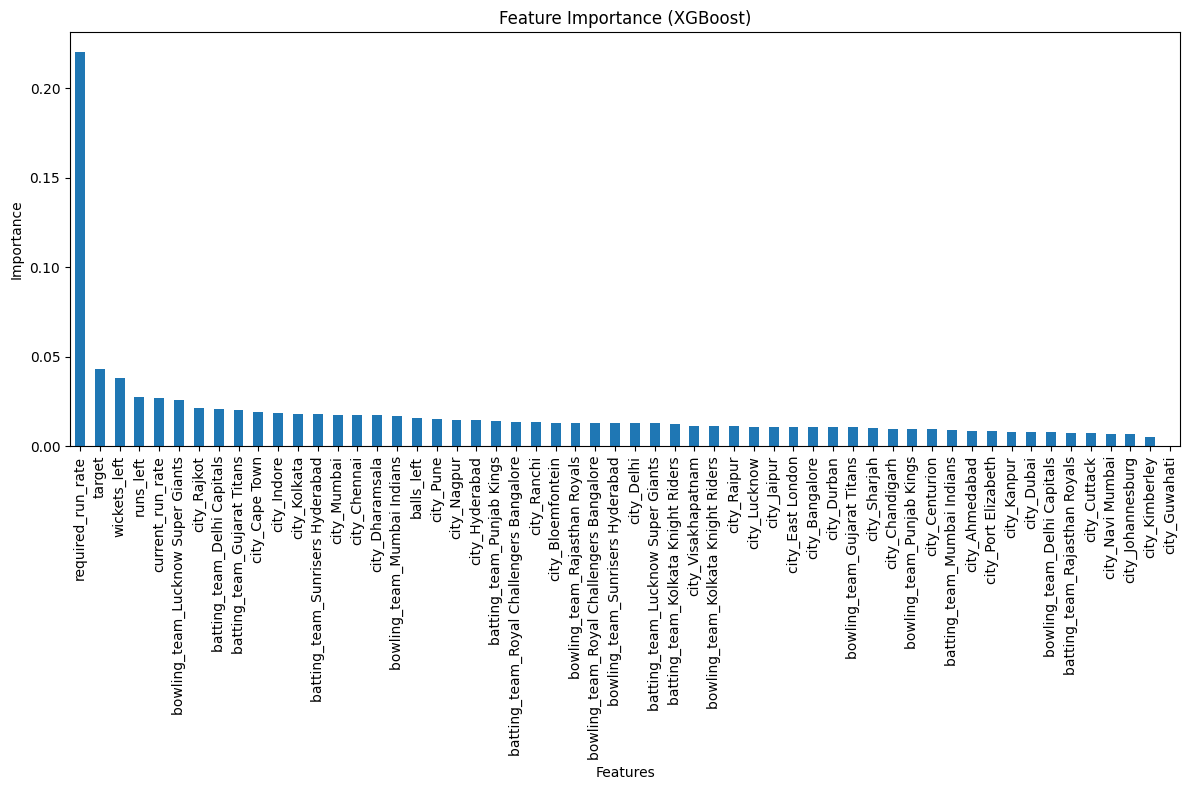

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the trained XGBoost model
# Access the classifier step in the pipeline
feature_importances_xgb = best_model_1.named_steps['classifier'].feature_importances_

# Get the feature names after one-hot encoding and scaling
# This can be a bit tricky with pipelines, but you can access the transformer
# and its fitted feature names
ohe_features = best_model_1.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['batting_team', 'bowling_team', 'city'])
numeric_features = ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target']
all_features = list(ohe_features) + numeric_features

# Create a pandas Series to easily sort and plot
feature_importances_series_xgb = pd.Series(feature_importances_xgb, index=all_features)

# Sort the features by importance
sorted_importances_xgb = feature_importances_series_xgb.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sorted_importances_xgb.plot(kind='bar')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

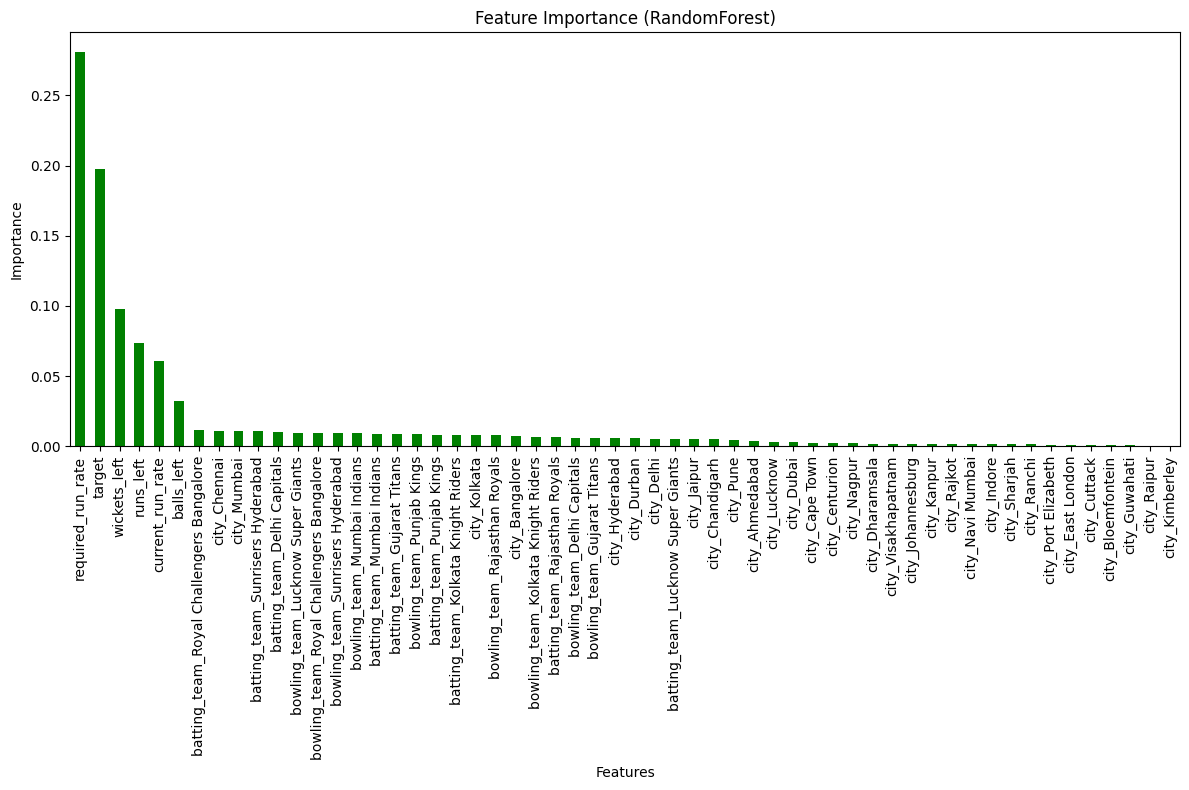

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the trained RandomForest model
# Access the classifier step in the pipeline
feature_importances_rf = best_model_2.named_steps['classifier'].feature_importances_

# Get the feature names (same as for XGBoost)
ohe_features = best_model_2.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['batting_team', 'bowling_team', 'city'])
numeric_features = ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target']
all_features = list(ohe_features) + numeric_features

# Create a pandas Series to easily sort and plot
feature_importances_series_rf = pd.Series(feature_importances_rf, index=all_features)

# Sort the features by importance
sorted_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sorted_importances_rf.plot(kind='bar', color='green')
plt.title('Feature Importance (RandomForest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
# This is a simplified conceptual example and not a complete implementation

# Function to simulate a match
def simulate_match(team1, team2, city, model):

    dummy_input = pd.DataFrame({
        'batting_team': [team1],
        'bowling_team': [team2],
        'city': [city],
        'runs_left': [150],  # Example values - needs more realistic generation
        'balls_left': [110],
        'wickets_left': [7],
        'current_run_rate': [8.0],
        'required_run_rate': [10.0],
        'target': [200]
    })

    # Predict the probability of winning for the batting team
    winning_probability = model.predict_proba(dummy_input)[:, 1][0]

    # Simulate the outcome based on probability
    if random.random() < winning_probability:
        return team1  # Batting team wins
    else:
        return team2  # Bowling team wins

# Example usage (assuming you have a list of teams for IPL 2025)
import random

teams_2025 = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
]


team1 = 'Mumbai Indians'
team2 = 'Chennai Super Kings'
match_city = 'Mumbai'

# Assuming 'best_model_1' (your trained XGBoost model) is available
predicted_winner = simulate_match(team1, team2, match_city, best_model_1)
print(f"Simulated winner of the match between {team1} and {team2} in {match_city}: {predicted_winner}")


Simulated winner of the match between Mumbai Indians and Chennai Super Kings in Mumbai: Chennai Super Kings


In [111]:
# Sample input
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.33512914, 0.66487086]])

In [112]:
# Train the voting classifier on the entire dataset for more accuracy
X = winning_pred.drop(['result', 'season'], axis=1)
y = winning_pred['result']

best_model_1.fit(X, y)
best_model_2.fit(X, y)
final_model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[07:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[07:49:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['batting_team',
                                                                                 'bowling_team',
                                                                                 'city']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['runs_left',
                                                                                 'balls_left',
                                                                                 'wickets_left',
                                                                                 'current_run_rate',
                                                                                 'required_run_rate',
                                                                                 'ta...
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['batting_team',
                                                                                 'bowling_team',
                                                                                 'city']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['runs_left',
                                                                                 'balls_left',
                                                                                 'wickets_left',
                                                                                 'current_run_rate',
                                                                                 'required_run_rate',
                                                                                 'target'])])),
                                              ('classifier',
                                               RandomForestClassifier(max_depth=np.int64(20),
                                                                      min_samples_leaf=14,
                                                                      min_samples_split=19,
                                                                      n_estimators=314,
                                                                      random_state=42))]))],
                 voting='soft')

In [113]:
import joblib

# Assuming best_model_1 is your trained pipeline
joblib.dump(best_model_1, 'ipl_winner_model.pkl')
print("Model saved as ipl_winner_model.pkl")

Model saved as ipl_winner_model.pkl


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



Accuracy - XGBoost: 0.8119
Accuracy - RandomForest: 0.8017
Accuracy - SVM: 0.7604


<ipython-input-114-0c5c10032e1c>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




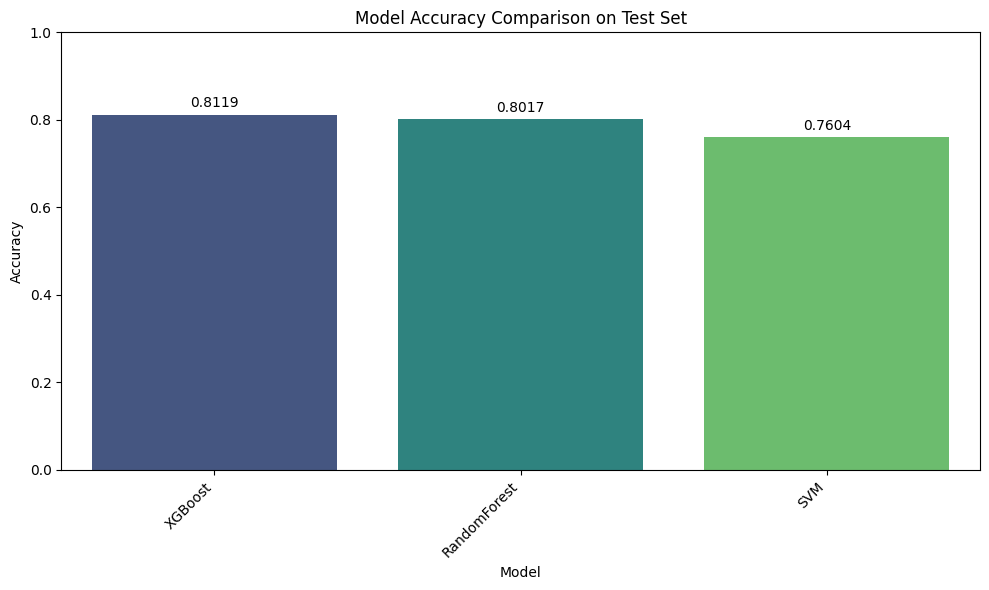

In [114]:
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas if not already imported for the next cell
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn

accuracy_xgb = accuracy_score(y_test_24, y_pred_xgb)
accuracy_rf = accuracy_score(y_test_24, y_pred_rf)

# Generate predictions for the SVM model on the test set (X_test_24)
y_pred_svm = best_model.predict(X_test_24)

# Calculate the accuracy using the correct predictions and true labels
accuracy_svm = accuracy_score(y_test_24, y_pred_svm)

print(f"Accuracy - XGBoost: {accuracy_xgb:.4f}")
print(f"Accuracy - RandomForest: {accuracy_rf:.4f}")
print(f"Accuracy - SVM: {accuracy_svm:.4f}")

# --- Plotting the comparison ---

# Create a dictionary of model accuracies
model_accuracies = {
    'XGBoost': accuracy_xgb,
    'RandomForest': accuracy_rf,
    'SVM': accuracy_svm
}

# Convert to a pandas Series for easy plotting
accuracies_series = pd.Series(model_accuracies)

# Sort for a cleaner bar plot (optional)
accuracies_series = accuracies_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis') # Use seaborn for nice styling
plt.title('Model Accuracy Comparison on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 (accuracy range)
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies_series.values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()

Accuracy - XGBoost: 0.8119
Accuracy - RandomForest: 0.8017
Accuracy - SVM: 0.7604


<ipython-input-115-9d781479edbf>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




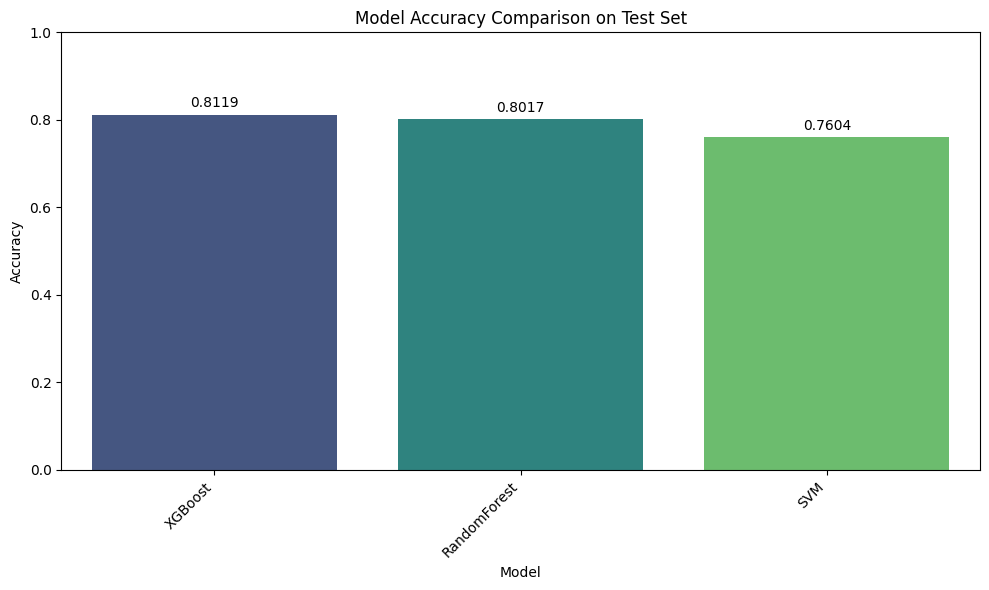

<ipython-input-115-9d781479edbf>:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




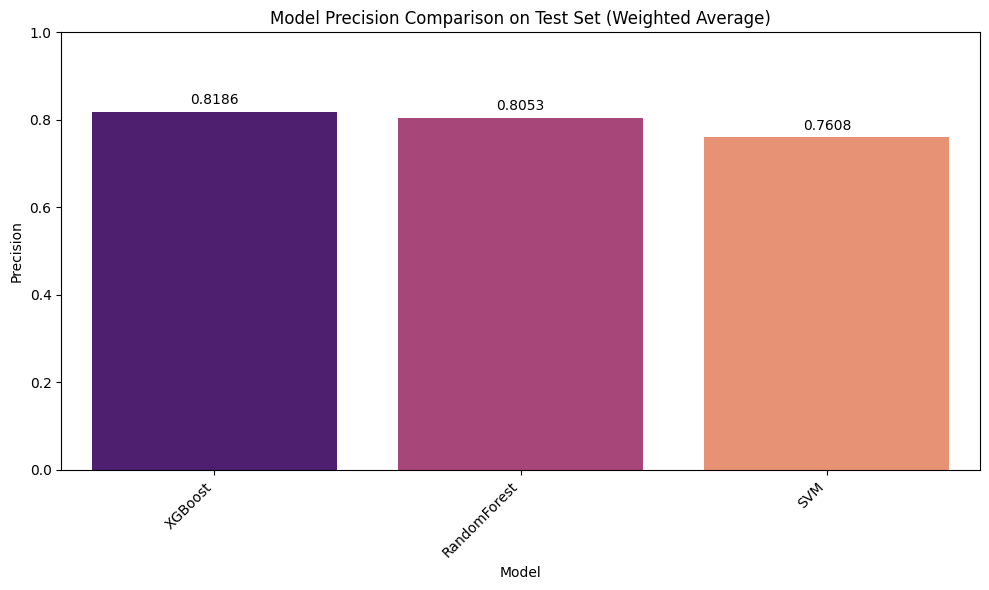

<ipython-input-115-9d781479edbf>:107: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




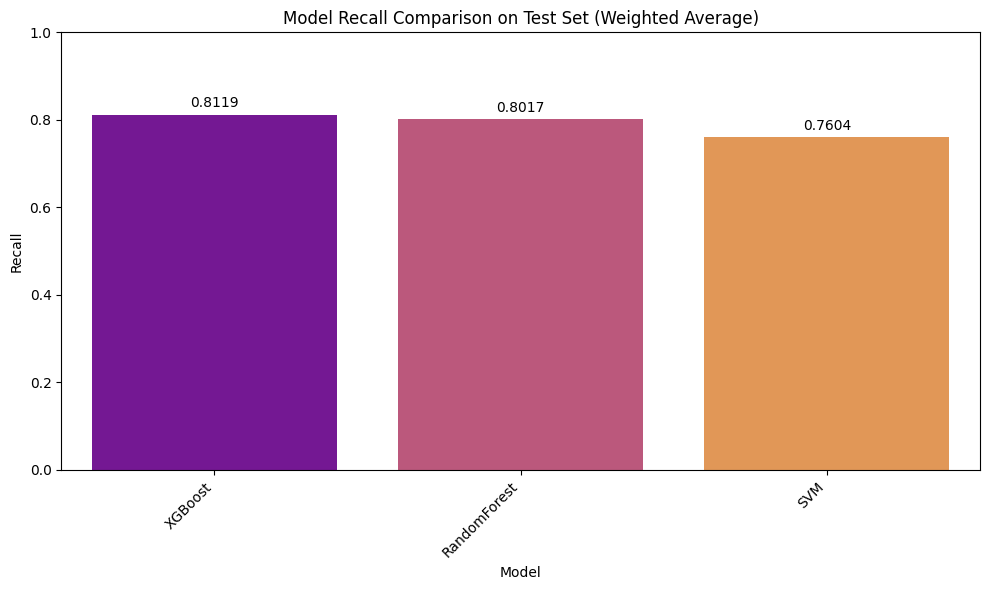

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure necessary libraries are imported

accuracy_xgb = accuracy_score(y_test_24, y_pred_xgb)
accuracy_rf = accuracy_score(y_test_24, y_pred_rf)

# Assuming y_pred_svm is already generated from the previous step where the SVM model was run on X_test_24
# If not, uncomment the line below to generate it:
# y_pred_svm = best_model.predict(X_test_24)
accuracy_svm = accuracy_score(y_test_24, y_pred_svm)

print(f"Accuracy - XGBoost: {accuracy_xgb:.4f}")
print(f"Accuracy - RandomForest: {accuracy_rf:.4f}")
print(f"Accuracy - SVM: {accuracy_svm:.4f}")

# --- Calculate Precision and Recall ---
precision_xgb = precision_score(y_test_24, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_24, y_pred_xgb, average='weighted')

precision_rf = precision_score(y_test_24, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_24, y_pred_rf, average='weighted')

precision_svm = precision_score(y_test_24, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_24, y_pred_svm, average='weighted')

# --- Plotting Accuracy Comparison ---

# Create a dictionary of model accuracies
model_accuracies = {
    'XGBoost': accuracy_xgb,
    'RandomForest': accuracy_rf,
    'SVM': accuracy_svm
}

# Convert to a pandas Series for easy plotting
accuracies_series = pd.Series(model_accuracies)

# Sort for a cleaner bar plot (optional)
accuracies_series = accuracies_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_series.index, y=accuracies_series.values, palette='viridis') # Use seaborn for nice styling
plt.title('Model Accuracy Comparison on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 (accuracy range)
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies_series.values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()


# --- Plotting Precision Comparison ---

# Create a dictionary of model precision scores
model_precisions = {
    'XGBoost': precision_xgb,
    'RandomForest': precision_rf,
    'SVM': precision_svm
}

# Convert to a pandas Series for easy plotting
precisions_series = pd.Series(model_precisions)

# Sort for a cleaner bar plot (optional)
precisions_series = precisions_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=precisions_series.index, y=precisions_series.values, palette='magma')
plt.title('Model Precision Comparison on Test Set (Weighted Average)')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add precision values on top of the bars
for i, v in enumerate(precisions_series.values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()


# --- Plotting Recall Comparison ---

# Create a dictionary of model recall scores
model_recalls = {
    'XGBoost': recall_xgb,
    'RandomForest': recall_rf,
    'SVM': recall_svm
}

# Convert to a pandas Series for easy plotting
recalls_series = pd.Series(model_recalls)

# Sort for a cleaner bar plot (optional)
recalls_series = recalls_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=recalls_series.index, y=recalls_series.values, palette='plasma')
plt.title('Model Recall Comparison on Test Set (Weighted Average)')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add recall values on top of the bars
for i, v in enumerate(recalls_series.values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()

In [116]:
# Sample input
l = [['Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kolkata', 140, 119, 10 ,6, 7, 145]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.31501895, 0.68498105]])

In [125]:
def create_match_scenario(batting_team, bowling_team, city, target,
                         current_score, balls_faced, wickets_lost):
    """Create a match scenario for prediction"""
    balls_left = 120 - balls_faced  # 20 overs = 120 balls
    runs_left = target - current_score
    wickets_left = 10 - wickets_lost

    # Calculate run rates
    if balls_faced > 0:
        current_run_rate = (current_score * 6) / balls_faced
    else:
        current_run_rate = 0

    if balls_left > 0:
        required_run_rate = (runs_left * 6) / balls_left
    else:
        required_run_rate = 0

    return {
        'batting_team': batting_team,  # Changed from 'Batting_team'
        'bowling_team': bowling_team,  # Changed from 'Bowling_team'
        'city': city,
        'runs_left': runs_left,
        'balls_left': balls_left,
        'wickets_left': wickets_left,
        'current_run_rate': current_run_rate,
        'required_run_rate': required_run_rate,
        'target': target
    }

# Rest of the code remains the same
import pandas as pd
import numpy as np
from datetime import datetime
import joblib

# Read the IPL 2025 fixtures
def load_ipl_2025_fixtures():
    """Load IPL 2025 fixtures from CSV"""
    try:
        fixtures = pd.read_csv('/content/ipl-2025-UTC (1).csv')
        return fixtures
    except FileNotFoundError:
        print("Fixture file not found. Please ensure 'ipl-2025-UTC (1).csv' is in the current directory.")
        return None

# Save your trained model and preprocessor for future use
joblib.dump(best_model_1, 'ipl_xgb_best_model.pkl')

# Stadium to city mapping for the venues in the fixture
STADIUM_CITY_MAPPING = {
    'Eden Gardens': 'Kolkata',
    'Rajiv Gandhi International Stadium': 'Hyderabad',
    'MA Chidambaram Stadium': 'Chennai',
    'Dr YS Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam',
    'Narendra Modi Stadium': 'Ahmedabad',
    'ACA Stadium': 'Guwahati',
    'Wankhede Stadium': 'Mumbai',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Crick': 'Lucknow',
    'M Chinnaswamy Stadium': 'Bangalore',
    'New PCA Stadium': 'Mohali',
    'Sawai Mansingh Stadium': 'Jaipur',
    'Arun Jaitley Stadium': 'Delhi',
    'Himachal Pradesh Cricket Association Stadium': 'Dharamshala'
}

# Team name standardization
TEAM_NAME_MAPPING = {
    'Kolkata Knight Riders': 'Kolkata Knight Riders',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad',
    'Rajasthan Royals': 'Rajasthan Royals',
    'Chennai Super Kings': 'Chennai Super Kings',
    'Mumbai Indians': 'Mumbai Indians',
    'Delhi Capitals': 'Delhi Capitals',
    'Lucknow Super Giants': 'Lucknow Super Giants',
    'Gujarat Titans': 'Gujarat Titans',
    'Punjab Kings': 'Punjab Kings'
}

def standardize_team_name(team_name):
    """Standardize team names to match training data"""
    return TEAM_NAME_MAPPING.get(team_name, team_name)

def get_city_from_stadium(stadium):
    """Get city name from stadium"""
    return STADIUM_CITY_MAPPING.get(stadium, 'Mumbai')  # Default to Mumbai if not found

def predict_fixture_outcome(home_team, away_team, venue, model,
                           estimated_first_innings_score=170):
    """
    Predict outcome for a fixture based on historical patterns and typical match scenarios
    """
    city = get_city_from_stadium(venue)
    home_team_std = standardize_team_name(home_team)
    away_team_std = standardize_team_name(away_team)

    predictions = []

    # Scenario 1: Home team batting first, mid-innings scenario
    scenario_1 = create_match_scenario(
        batting_team=home_team_std,
        bowling_team=away_team_std,
        city=city,
        target=estimated_first_innings_score,
        current_score=int(estimated_first_innings_score * 0.5),  # 50% of target
        balls_faced=60,  # 10 overs
        wickets_lost=3
    )

    # Scenario 2: Away team batting first, mid-innings scenario
    scenario_2 = create_match_scenario(
        batting_team=away_team_std,
        bowling_team=home_team_std,
        city=city,
        target=estimated_first_innings_score,
        current_score=int(estimated_first_innings_score * 0.5),  # 50% of target
        balls_faced=60,  # 10 overs
        wickets_lost=3
    )

    # Convert to DataFrame and predict
    df_1 = pd.DataFrame([scenario_1])
    df_2 = pd.DataFrame([scenario_2])

    pred_1 = model.predict(df_1)[0]
    prob_1 = model.predict_proba(df_1)[0].max()

    pred_2 = model.predict(df_2)[0]
    prob_2 = model.predict_proba(df_2)[0].max()

    # Determine overall match prediction based on both scenarios
    home_wins = sum([1 for p in [pred_1, pred_2] if p == home_team_std])
    away_wins = sum([1 for p in [pred_1, pred_2] if p == away_team_std])

    if home_wins > away_wins:
        predicted_winner = home_team_std
        confidence = (prob_1 + prob_2) / 2
    elif away_wins > home_wins:
        predicted_winner = away_team_std
        confidence = (prob_1 + prob_2) / 2
    else:
        # Tie-breaker: higher individual probability
        if prob_1 > prob_2:
            predicted_winner = pred_1
            confidence = prob_1
        else:
            predicted_winner = pred_2
            confidence = prob_2

    return {
        'home_team': home_team,
        'away_team': away_team,
        'venue': venue,
        'city': city,
        'predicted_winner': predicted_winner,
        'confidence': round(confidence, 3),
        'home_batting_prediction': pred_1,
        'away_batting_prediction': pred_2,
        'estimated_score': estimated_first_innings_score
    }

def analyze_ipl_2025_fixtures(model):
    """Analyze all IPL 2025 fixtures and make predictions"""
    fixtures_df = load_ipl_2025_fixtures()

    if fixtures_df is None:
        return None

    # Filter out playoff matches (TBA teams)
    regular_fixtures = fixtures_df[
        (fixtures_df['Home Team'] != 'To be announced') &
        (fixtures_df['Away Team'] != 'To be announced')
    ].copy()

    predictions = []

    # Historical average scores for different venues (approximate)
    venue_scores = {
        'Eden Gardens': 163,
        'Wankhede Stadium': 184,
        'M Chinnaswamy Stadium': 174,
        'Narendra Modi Stadium': 172,
        'MA Chidambaram Stadium': 165,
        'Rajiv Gandhi International Stadium': 170,
        'Arun Jaitley Stadium': 170,
        'Sawai Mansingh Stadium': 175,
        'New PCA Stadium': 165,
        'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Crick': 170
    }

    for idx, row in regular_fixtures.iterrows():
        estimated_score = venue_scores.get(row['Location'], 170)

        prediction = predict_fixture_outcome(
            home_team=row['Home Team'],
            away_team=row['Away Team'],
            venue=row['Location'],
            model=model,
            estimated_first_innings_score=estimated_score
        )

        prediction['match_number'] = row['Match Number']
        prediction['date'] = row['Date']
        prediction['round'] = row['Round Number']

        predictions.append(prediction)

    return pd.DataFrame(predictions)

# Generate predictions for all IPL 2025 fixtures
print("Generating IPL 2025 Fixture Predictions...")
print("=" * 60)

predictions_df = analyze_ipl_2025_fixtures(best_model_1)

if predictions_df is not None:
    # Display predictions
    print(f"Total matches to predict: {len(predictions_df)}")
    print("\nTop 10 Match Predictions:")
    print("-" * 80)

    for idx, row in predictions_df.head(10).iterrows():
        print(f"Match {row['match_number']}: {row['home_team']} vs {row['away_team']}")
        print(f"Venue: {row['venue']} ({row['city']})")
        print(f"Date: {row['date']}")
        print(f"Predicted Winner: {row['predicted_winner']}")
        print(f"Confidence: {row['confidence']}")
        print(f"Expected Score: {row['estimated_score']}")
        print("-" * 40)

    # Team-wise win predictions summary
    print("\nTeam-wise Win Predictions Summary:")
    print("=" * 40)

    team_wins = predictions_df['predicted_winner'].value_counts()
    total_matches_per_team = 14  # Each team plays 14 matches in league stage

    for team, wins in team_wins.items():
        win_percentage = (wins / total_matches_per_team) * 100
        print(f"{team}: {wins} wins ({win_percentage:.1f}%)")

    # Venue-wise analysis
    print("\nVenue Analysis:")
    print("=" * 30)
    venue_analysis = predictions_df.groupby('venue').agg({
        'confidence': 'mean',
        'estimated_score': 'mean',
        'predicted_winner': 'count'
    }).round(2)
    venue_analysis.columns = ['Avg_Confidence', 'Avg_Score', 'Matches']
    print(venue_analysis)

    # Save predictions to CSV
    predictions_df.to_csv('ipl_2025_predictions.csv', index=False)
    print(f"\nPredictions saved to 'ipl_2025_predictions.csv'")

    # Round-wise analysis
    print("\nRound-wise Performance Predictions:")
    print("=" * 40)

    round_analysis = predictions_df.groupby('round').agg({
        'confidence': 'mean',
        'predicted_winner': lambda x: x.value_counts().head(3).to_dict()
    }).round(3)

    for round_num in sorted(predictions_df['round'].unique()):
        round_data = predictions_df[predictions_df['round'] == round_num]
        top_teams = round_data['predicted_winner'].value_counts().head(3)
        avg_confidence = round_data['confidence'].mean()

        print(f"Round {round_num}:")
        print(f"  Average Confidence: {avg_confidence:.3f}")
        print(f"  Top Performing Teams:")
        for team, wins in top_teams.items():
            print(f"    {team}: {wins} wins")
        print()

else:
    print("Could not load fixture data. Please check the CSV file.")

# Function for live match prediction during IPL 2025
def live_ipl_2025_prediction(match_number, current_score, overs_faced,
                            wickets_lost, first_innings_score=None):
    """
    Make prediction for a live IPL 2025 match
    """
    fixtures_df = load_ipl_2025_fixtures()

    if fixtures_df is None:
        return "Fixture data not available"

    # Find the match
    match_info = fixtures_df[fixtures_df['Match Number'] == match_number]

    if match_info.empty:
        return f"Match {match_number} not found"

    match_row = match_info.iloc[0]
    home_team = standardize_team_name(match_row['Home Team'])
    away_team = standardize_team_name(match_row['Away Team'])
    venue = match_row['Location']
    city = get_city_from_stadium(venue)

    # Determine batting team (assume away team is batting in second innings)
    if first_innings_score is None:
        # First innings scenario
        batting_team = home_team
        bowling_team = away_team
        target = 170  # Estimated target
    else:
        # Second innings scenario
        batting_team = away_team
        bowling_team = home_team
        target = first_innings_score + 1

    balls_faced = int(overs_faced * 6)

    scenario = create_match_scenario(
        batting_team=batting_team,
        bowling_team=bowling_team,
        city=city,
        target=target,
        current_score=current_score,
        balls_faced=balls_faced,
        wickets_lost=wickets_lost
    )

    scenario_df = pd.DataFrame([scenario])
    prediction = best_model_1.predict(scenario_df)[0]
    probability = best_model_1.predict_proba(scenario_df)[0].max()

    return {
        'match_info': f"Match {match_number}: {home_team} vs {away_team}",
        'venue': f"{venue} ({city})",
        'match_situation': f"{batting_team} need {scenario['runs_left']} runs in {scenario['balls_left']} balls",
        'predicted_winner': prediction,
        'win_probability': round(probability, 3),
        'required_run_rate': round(scenario['required_run_rate'], 2),
        'current_run_rate': round(scenario['current_run_rate'], 2)
    }

# Example live match prediction
print("\n" + "="*60)
print("LIVE MATCH PREDICTION EXAMPLE")
print("="*60)

# Example: Match 3 - CSK vs MI at Chennai
live_example = live_ipl_2025_prediction(
    match_number=3,
    current_score=95,
    overs_faced=12.5,
    wickets_lost=4,
    first_innings_score=178  # MI scored 178, CSK chasing
)

if isinstance(live_example, dict):
    print("Live Match Prediction:")
    for key, value in live_example.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
else:
    print(live_example)

print(f"\nModel and predictions ready for IPL 2025!")
print(f"Total fixtures analyzed: {len(predictions_df) if predictions_df is not None else 0}")

Generating IPL 2025 Fixture Predictions...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



Total matches to predict: 70

Top 10 Match Predictions:
--------------------------------------------------------------------------------
Match 1: Kolkata Knight Riders vs Royal Challengers Bengaluru
Venue: Eden Gardens (Kolkata)
Date: 22/03/2025 14:00
Predicted Winner: 1
Confidence: 0.6890000104904175
Expected Score: 163
----------------------------------------
Match 2: Sunrisers Hyderabad vs Rajasthan Royals
Venue: Rajiv Gandhi International Stadium (Hyderabad)
Date: 23/03/2025 10:00
Predicted Winner: 0
Confidence: 0.6050000190734863
Expected Score: 170
----------------------------------------
Match 3: Chennai Super Kings vs Mumbai Indians
Venue: MA Chidambaram Stadium (Chennai)
Date: 23/03/2025 14:00
Predicted Winner: 0
Confidence: 0.5379999876022339
Expected Score: 165
----------------------------------------
Match 4: Delhi Capitals vs Lucknow Super Giants
Venue: Dr YS Rajasekhara Reddy ACA-VDCA Cricket Stadium (Visakhapatnam)
Date: 24/03/2025 14:00
Predicted Winner: 0
Confidence: 0

In [126]:
# Display the final predictions DataFrame
print("\nIPL 2025 Fixture Predictions Table:")
print("=" * 80)
display(predictions_df[['match_number', 'date', 'round', 'home_team', 'away_team', 'venue', 'city', 'predicted_winner', 'confidence', 'estimated_score']])


IPL 2025 Fixture Predictions Table:


,match_number,date,round,home_team,away_team,venue,city,predicted_winner,confidence,estimated_score
0,1,22/03/2025 14:00,1,Kolkata Knight Riders,Royal Challengers Bengaluru,Eden Gardens,Kolkata,1,0.689,163
1,2,23/03/2025 10:00,1,Sunrisers Hyderabad,Rajasthan Royals,Rajiv Gandhi International Stadium,Hyderabad,0,0.605,170
2,3,23/03/2025 14:00,1,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,Chennai,0,0.538,165
3,4,24/03/2025 14:00,1,Delhi Capitals,Lucknow Super Giants,Dr YS Rajasekhara Reddy ACA-VDCA Cricket Stadium,Visakhapatnam,0,0.612,170
4,5,25/03/2025 14:00,1,Gujarat Titans,Punjab Kings,Narendra Modi Stadium,Ahmedabad,1,0.672,172
...,...,...,...,...,...,...,...,...,...,...
65,58,24/05/2025 14:00,9,Punjab Kings,Delhi Capitals,Sawai Mansingh Stadium,Jaipur,1,0.601,175
66,69,25/05/2025 10:00,9,Gujarat Titans,Chennai Super Kings,Narendra Modi Stadium,Ahmedabad,1,0.667,172
67,60,25/05/2025 14:00,9,Sunrisers Hyderabad,Kolkata Knight Riders,Arun Jaitley Stadium,Delhi,0,0.619,170
68,61,26/05/2025 14:00,9,Punjab Kings,Mumbai Indians,Sawai Mansingh Stadium,Jaipur,1,0.613,175


In [131]:
def interactive_prediction():
    """Interactive function to get user input and make predictions"""
    print("\n" + "="*60)
    print("INTERACTIVE CRICKET MATCH PREDICTOR")
    print("="*60)

    # Get user input
    season = int(input("Enter season (e.g., 2023): "))
    batting_team = input("Enter batting team (e.g., MI, CSK, RCB): ").upper()
    bowling_team = input("Enter bowling team (e.g., MI, CSK, RCB): ").upper()
    city = input("Enter city (e.g., Mumbai, Chennai, Bangalore): ")
    target = int(input("Enter target score: "))
    current_runs = int(input("Enter current runs: "))
    overs_completed = float(input("Enter overs completed (e.g., 10.3): "))
    wickets_lost = int(input("Enter wickets lost: "))
    total_overs = int(input("Enter total overs (20 for T20, 50 for ODI): "))

    # Create predictor with sample data
    df = create_sample_data()
    predictor = CricketPredictor()
    predictor.train(df)

    # Make prediction
    result = predictor.predict_match(
        season, batting_team, bowling_team, city,
        target, current_runs, overs_completed, wickets_lost, total_overs
    )

    return result

# Uncomment the line below to run interactive prediction
# interactive_prediction()